In [16]:
import keras
from keras.layers import Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils.np_utils import to_categorical

import ecgclassification as ecgc
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from ecgclassification import focal_loss

db = 'ecgclassification/mitdb/'


data = ecgc.load_data(db, classes='aami')




Loading beats took 22.3s
Loading the signals took: 8.5s


[https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras](here)

Classifier weighted CNN

In [17]:
X_train, y_train = data['train'][0], data['train'][1]
X_test, y_test = data['tests'][0], data['tests'][1]

n_features = 1
n_classes = 5
batch_size = X_train.shape[0]
sequence_size = X_train.shape[1]
X_train = X_train.reshape([batch_size, sequence_size, 1])
X_train = tf.convert_to_tensor(X_train)
X_test = X_test.reshape([X_test.shape[0], X_test.shape[1], 1])
X_test = tf.convert_to_tensor(X_test)
print(X_train.ndim)

input_shape = (None, sequence_size, n_features)
model = Sequential()
model.add(Conv1D(
        input_shape = input_shape,
        filters=8,
        kernel_size=4,
        padding='same',
        activation='relu',
    ))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))


loss = keras.losses.SparseCategoricalCrossentropy()
# loss = focal_loss(alpha=1)
# Compiling the model
model.compile(
    optimizer='adam',
    loss=loss,
    metrics=["accuracy"]
)
model.build(input_shape=input_shape)
model.summary()

#y_train = to_categorical(y_train, 5)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
history = model.fit(X_train,
          y_train,
          epochs=1,
          verbose=2)






3
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_6 (ModuleWrap (None, 1024, 8)           40        
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 40965     
Total params: 41,005
Trainable params: 41,005
Non-trainable params: 0
_________________________________________________________________
1592/1592 - 7s - loss: 0.2459 - accuracy: 0.9351


1551/1551 [==============================] - 3s 2ms/step - loss: 0.3716 - accuracy: 0.9194

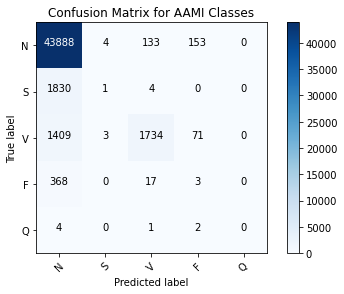

In [22]:
prediction = model.predict(X_test, verbose=1)
prediction = prediction.argmax(axis=-1)

#aami_pred = [np.where(ba == np.amax(ba)) for ba in prediction]
ecgc.evaluate_model(model, X_test, y_test, input_format='aami_num', keras_evaluation=True)

In [ ]:
model.save('models')